Connected to xai (Python 3.8.0)

In [11]:
from utils import DataLoader

import matplotlib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import shap

In [12]:
data_loader = DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()
# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()
# Oversample the train data
X_train, y_train = data_loader.oversample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)

(7778, 21)
(1022, 21)


In [13]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
# TODO: Other models

F1 Score 0.5176263793496305
Accuracy 0.9432485322896281


In [14]:
# Shapley additive explainations
explainer = shap.TreeExplainer(rf)
# Calculate shapley values for test data
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi
2813,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,43.0,0,0,91.13,33.9


In [15]:
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values

(1, 21)


[array([[ 9.06129063e-03,  9.01060902e-03, -7.14617550e-07,
         -5.70712406e-03, -4.09723405e-03, -2.05297904e-04,
         -2.34066216e-05,  3.62480610e-03,  1.03994930e-02,
         -2.84588576e-03,  8.55525890e-03,  7.71238614e-03,
         -5.07945036e-04,  1.52062524e-02,  1.66679276e-02,
          5.73088440e-03,  2.38692306e-01,  1.10069715e-02,
          9.10544785e-03,  9.16873726e-02,  7.63570467e-02]]),
 array([[-9.06129063e-03, -9.01060902e-03,  7.14617550e-07,
          5.70712406e-03,  4.09723405e-03,  2.05297904e-04,
          2.34066216e-05, -3.62480610e-03, -1.03994930e-02,
          2.84588576e-03, -8.55525890e-03, -7.71238614e-03,
          5.07945036e-04, -1.52062524e-02, -1.66679276e-02,
         -5.73088440e-03, -2.38692306e-01, -1.10069715e-02,
         -9.10544785e-03, -9.16873726e-02, -7.63570467e-02]])]

The RF predicted: 0


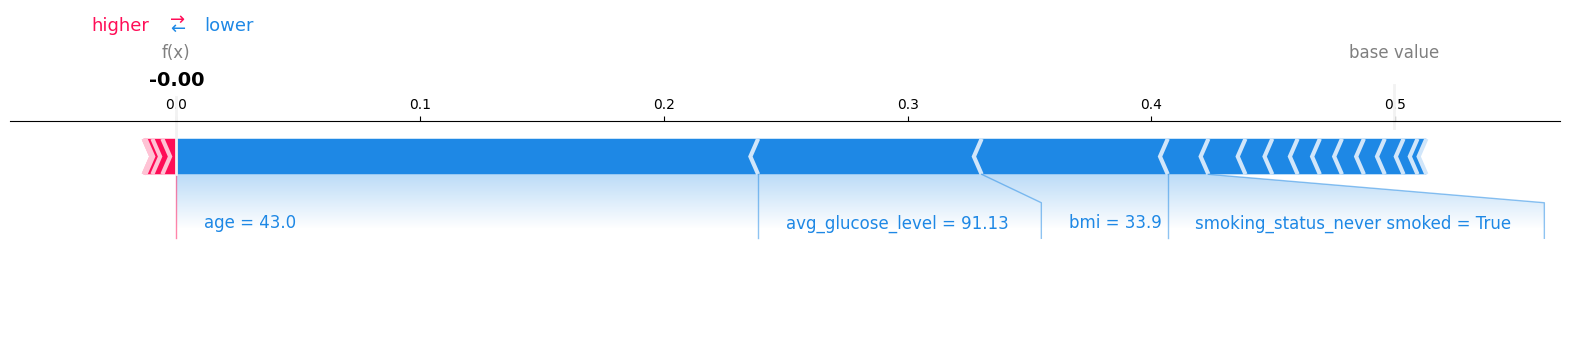

In [16]:
shap.initjs()
# Force plot
prediction = rf.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index],
                matplotlib=matplotlib) # for values

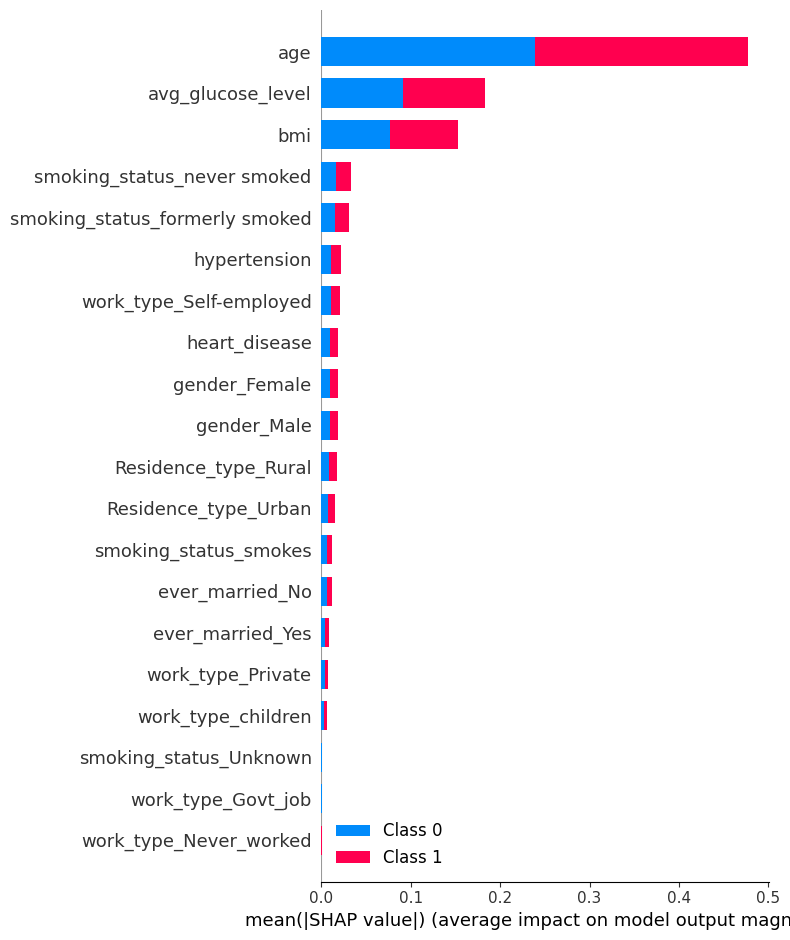

In [17]:
# Feature summary
shap.summary_plot(shap_values, X_test)

In [18]:
explains = explainer(X_test)

In [23]:
# TODO: Try other plots
shap.plots.waterfall(explains[0])

ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (21, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.